In [ ]:
!pip install catboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Load Libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
# Load Dataset
df = pd.read_json('/content/drive/MyDrive/CETM47-23_24-AS2-Data.json')
df.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


Text(0.5, 0, 'Labels')

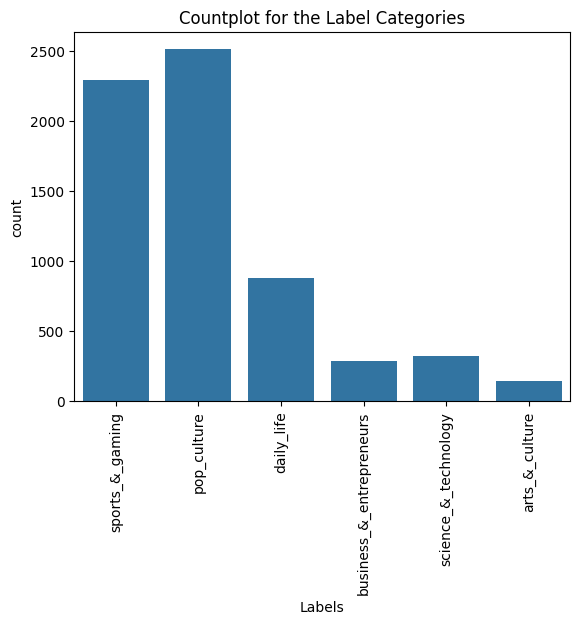

In [6]:
# Countplot for the Label Categories
sns.countplot(data=df, x='label_name')
plt.xticks(rotation=90)
plt.title('Countplot for the Label Categories')
plt.xlabel('Labels')

In [7]:
df[['label', 'label_name']].value_counts()

label  label_name              
2      pop_culture                 2512
4      sports_&_gaming             2291
3      daily_life                   883
5      science_&_technology         326
1      business_&_entrepreneurs     287
0      arts_&_culture               144
Name: count, dtype: int64

**Data Cleaning and Preprocessing**

In [8]:
# Drop id, date and label name columns
df.drop(['id','date', 'label_name'], axis=1,  inplace = True)

In [9]:
# Check column details remaining in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6443 non-null   object
 1   label   6443 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 100.8+ KB


In [10]:
#checking for null values
df.isna().sum()

text     0
label    0
dtype: int64

In [11]:
df.head()

,text,label
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4
1,I would rather hear Eli Gold announce this Aub...,4
2,"Someone take my phone away, I’m trying to not ...",4
3,"A year ago, Louisville struggled to beat an FC...",4
4,Anyone know why the #Dodgers #Orioles game nex...,4


In [12]:
def preprocessing(text):
    #remove name(@) tags
    text=re.sub('{.*?}', '', text)
    # remove digits
    text=re.sub(" \d+", " ", text)
    # removing non text characters
    text = re.sub(r'[^\w\s\']', ' ', text)
    #substite a multitple space with a single space
    text = re.sub(r' +', ' ', text)
    # removing a whitespaces and covert the whole text to lowercase
    text = text.strip().lower()
    # remove punctuation
    text=text.replace('[{}]'.format(string.punctuation), '')

    return text

In [13]:
# # apply preprocessing function
X = df['text'].apply(preprocessing)

In [14]:
#spliting the data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=100)

**Unigram Countvectorizer**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer =CountVectorizer(lowercase=True, stop_words= stopwords)
X_train_unigram = c_vectorizer.fit_transform(X_train)
X_test_unigram = c_vectorizer.transform(X_test)

In [16]:
#support vector machine
from sklearn.svm import SVC
classifier1 = SVC(kernel= 'rbf',random_state=0)
classifier1.fit(X_train_unigram,y_train)
classifier1.score(X_test_unigram, y_test)

0.7207137315748642

In [17]:
#Randomforest classisifier
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(random_state=0)
classifier2.fit(X_train_unigram,y_train)
classifier2.score(X_test_unigram, y_test)

0.7276958882854926

In [18]:
#catboost classify
from catboost import CatBoostClassifier
classifier3 = CatBoostClassifier(verbose=0, random_state=0)
classifier3.fit(X_train_unigram,y_train)
classifier3.score(X_test_unigram, y_test)

0.7222653219550039

In [19]:
## XGBOOST classify
from xgboost import XGBClassifier
classifier4 = XGBClassifier(random_state=0)
classifier4.fit(X_train_unigram,y_train)
classifier4.score(X_test_unigram, y_test)

0.7284716834755625

In [20]:
# converting a sparse matrix to array
X_train_unigram = X_train_unigram.toarray()
X_test_unigram = X_test_unigram.toarray()

# NAYES BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train_unigram,y_train)
classifier5.score(X_test_unigram, y_test)

0.6485647788983708

**Unigram + Bigram Countvectorizer**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer =CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words= stopwords)
X_train_bigram= c_vectorizer.fit_transform(X_train)
X_test_bigram= c_vectorizer.transform(X_test)

In [22]:
#support vector machine
from sklearn.svm import SVC
classifier1 = SVC(kernel= 'rbf',random_state=0)
classifier1.fit(X_train_bigram,y_train)
classifier1.score(X_test_bigram, y_test)

0.7191621411947245

In [23]:
#Randomforest classisifier
from sklearn.ensemble import RandomForestClassifier
classifier2= RandomForestClassifier(random_state=0)
classifier2.fit(X_train_bigram,y_train)
classifier2.score(X_test_bigram, y_test)

0.7230411171450737

In [24]:
#catboost classify
from catboost import CatBoostClassifier
classifier3 = CatBoostClassifier(verbose=0, random_state=0)
classifier3.fit(X_train_bigram,y_train)
classifier3.score(X_test_bigram, y_test)

0.7331264546159814

In [25]:
## XGBOOST
from xgboost import XGBClassifier
classifier4 = XGBClassifier(random_state=0)
classifier4.fit(X_train_bigram,y_train)
classifier4.score(X_test_bigram, y_test)

0.743211792086889

In [26]:
# converting a sparse matrix to array
X_train_bigram = X_train_bigram.toarray()
X_test_bigram = X_test_bigram.toarray()

# NAYES BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train_bigram,y_train)
classifier5.score(X_test_bigram, y_test)

0.7005430566330488

**TF-IDF (Unigram)**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
T_vectorizer = TfidfVectorizer(lowercase=True, stop_words= stopwords)
X_train_unigram_ = T_vectorizer.fit_transform(X_train)
X_test_unigram_ = T_vectorizer.transform(X_test)

In [28]:
#support vector machine
from sklearn.svm import SVC
classifier1 = SVC(kernel= 'rbf',random_state=0)
classifier1.fit(X_train_unigram_,y_train)
classifier1.score(X_test_unigram_, y_test)

0.7284716834755625

In [29]:
#Randomforest classisifier
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(random_state=0)
classifier2.fit(X_train_unigram_,y_train)
classifier2.score(X_test_unigram_, y_test)

0.7253685027152832

In [30]:
#catboost classify
from catboost import CatBoostClassifier
classifier3 = CatBoostClassifier(verbose=0, random_state=0)
classifier3.fit(X_train_unigram_,y_train)
classifier3.score(X_test_unigram_, y_test)

0.7245927075252133

In [31]:
from xgboost import XGBClassifier
classifier4 = XGBClassifier(random_state=0)
classifier4.fit(X_train_unigram_,y_train)
classifier4.score(X_test_unigram_, y_test)


0.7238169123351436

In [32]:
# converting a sparse matrix to array
X_train_unigram_ = X_train_unigram_.toarray()
X_test_unigram_ = X_test_unigram_.toarray()

# NAYES BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train_unigram_,y_train)
classifier5.score(X_test_unigram_, y_test)

0.6400310318076028

**TF-IDF (Unigram + Bigram)**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
T_vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=True, stop_words= stopwords)
X_train_bigram_ = T_vectorizer.fit_transform(X_train)
X_test_bigram_ = T_vectorizer.transform(X_test)

In [34]:
#support vector machine
from sklearn.svm import SVC
classifier1 = SVC(kernel= 'rbf',random_state=0)
classifier1.fit(X_train_bigram_ ,y_train)
classifier1.score(X_test_bigram_, y_test)

0.7269200930954228

In [35]:
#Randomforest classisifier
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(random_state=0)
classifier2.fit(X_train_bigram_ ,y_train)
classifier2.score(X_test_bigram_, y_test)

0.7284716834755625

In [36]:
#catboost classify
from catboost import CatBoostClassifier
classifier3 = CatBoostClassifier(verbose=0,random_state=0)
classifier3.fit(X_train_bigram_ ,y_train)
classifier3.score(X_test_bigram_, y_test)

0.734678044996121

In [37]:
## XGBOOST
from xgboost import XGBClassifier
classifier4 = XGBClassifier(random_state=0)
classifier4.fit(X_train_bigram_ ,y_train)
classifier4.score(X_test_bigram_, y_test)

0.7245927075252133

In [38]:
# converting a sparse matrix to array
X_train_bigram_ = X_train_bigram_.toarray()
X_test_bigram_ = X_test_bigram_.toarray()

# NAYES BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train_bigram_,y_train)
classifier5.score(X_test_bigram_, y_test)

0.6788207913110939